# THE BEST MODEL FOR FLOW PATTERN CLASSIFICATION IS EXTRA TREES


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Database address, enter your own Drive address.
PATH_DATA = './BDOShohamIML.csv'
path = "./" #Path for metric images

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
#Confusion matrix
def CM_viz():    
    my_title = "Confusion Matrix"
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True, title=my_title)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(path+name+"_CM.pdf")

# Classification report
def CR_viz():
    my_title = "Classification Report"
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True, title=my_title)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(path+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():    
    my_title = "Class Prediction Error"
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes, title=my_title)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(path+name+"_CPE.pdf")
                
#ROC-AUC
def ROC_viz():    
    my_title = "ROC Curves"
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, title=my_title)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(path+name+"_ROC.pdf")


In [5]:
def classifier_metrics():    
    def metrics(model):
        start_time = time.time()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        TIME = time.time() - start_time 
        print("Training Time: {0:.4f} [seconds]".format(TIME))

        start_time = time.time()
        y_pred = model.predict(X_test)
        TIME = time.time() - start_time 
        print("Prediction Time: {0:.4f} [seconds]".format(TIME))

        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0 
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred) 
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
 
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------\n") 

In [6]:
## Loading Data

# Velocity, Viscosity, Density, Surface Tension, Angle and Diameter
dataset = pd.DataFrame(pd.read_csv(PATH_DATA), columns=['Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST', 'Ang', 'ID', 'Flow Pattern']) 

# Summarize the Dataset 
print("shape of initial data =",dataset.shape) 
# Class Distribution 
print(dataset.groupby('Flow Pattern').size()) 
# Leaving only the best training variables
dataset = dataset.drop(['VisG', 'VisL','DenG', 'ST', 'DenL'], axis=1) #Los quitamos
print("shape of selected data =",dataset.shape) 

print(dataset.head()) 

# Split-out validation dataset 
array = dataset.values 
X = array[:,0:4] #Data or features 
Y = array[:,4]   #Label or classes 
validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=510) 

print("\ntrain data shape =",X_train.shape) 
print("train labels shape =",y_train.shape) 
print("test data shape =",X_test.shape) 
print("test labels shape =",y_test.shape) 


shape of initial data = (5675, 10)
Flow Pattern
A     1033
B      125
DB     594
I     2905
SS     140
SW     878
dtype: int64
shape of selected data = (5675, 5)
   Vsl    Vsg  Ang     ID Flow Pattern
0  6.3  0.025  0.0  0.051           DB
1  4.0  0.040  0.0  0.051           DB
2  6.3  0.040  0.0  0.051           DB
3  4.0  0.063  0.0  0.051           DB
4  6.3  0.063  0.0  0.051           DB

train data shape = (4540, 4)
train labels shape = (4540,)
test data shape = (1135, 4)
test labels shape = (1135,)


In [7]:
#classes 
classes = ['A', 'SS', 'DB', 'I', 'B', 'SW'] 

# select classifiers
classifiers=[
ExtraTreesClassifier(n_estimators=112, max_depth=62, min_samples_split=5, random_state=28000001)
]

names=['ET'] 

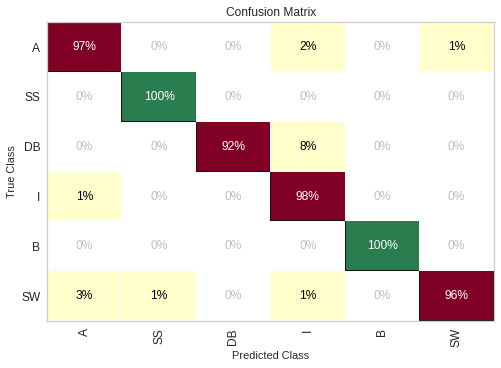

Train runtime: 0.35269975662231445
Test runtime: 0.10640931129455566


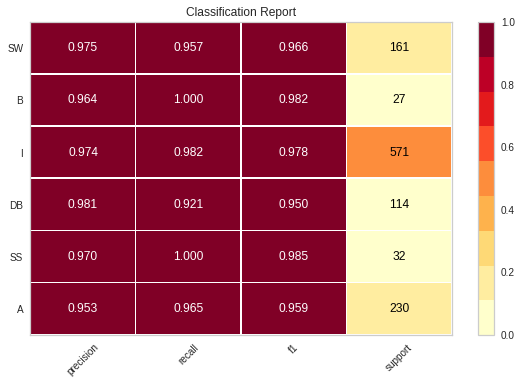

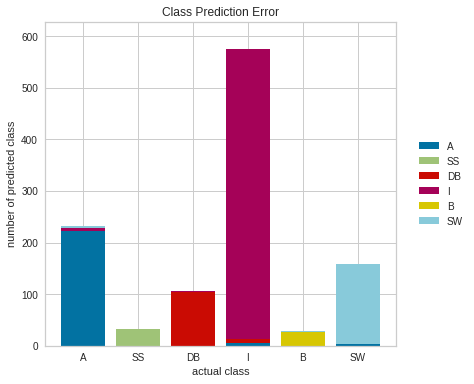

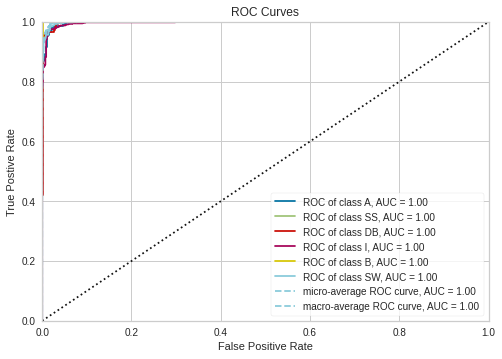

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=62, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=112,
                     n_jobs=None, oob_score=False, random_state=28000001,
                     verbose=0, warm_start=False)
Training Time: 0.3623 [seconds]
Prediction Time: 0.0369 [seconds]
accuracy_score: 0.9700
cohen_kappa_score: 0.9555
log_loss: 0.1661
zero_one_loss: 0.0300
hemming_loss: 0.0300
matthews_corrcoef: 0.9555

---------------------------------------------------------------------------------



In [8]:
visualization =[CM_viz(),CR_viz(),CPE_viz(),ROC_viz()] 
classifier_metrics() 